In [5]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [3]:
X,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_classes=3,n_clusters_per_class=1)
clf = SVC(C=1,kernel='rbf',gamma='auto')
clf.fit(X,y)

SVC(C=1, gamma='auto')

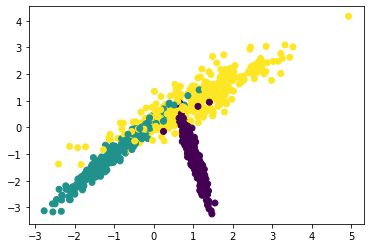

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [7]:
clf.predict([[-2,-2]])

array([1])

In [8]:
clf.predict([[3,3]])

array([2])

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_10244/2538593973.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


(-4.24359369619606, 5.15640630380374)

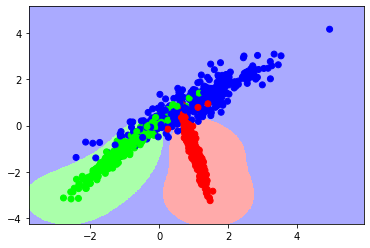

In [9]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#确认训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#生成随机数据来做测试集，然后作预测
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# 画出测试集数据
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

### 网格搜索调参（SVM RBF）

In [10]:
from sklearn import datasets,svm
from sklearn.svm import SVC
from sklearn.datasets import make_moons,make_circles,make_classification
%matplotlib inline

In [12]:
# 生成随机数据并归一化
X,y = make_circles(noise=0.2,factor=0.5,random_state=1)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

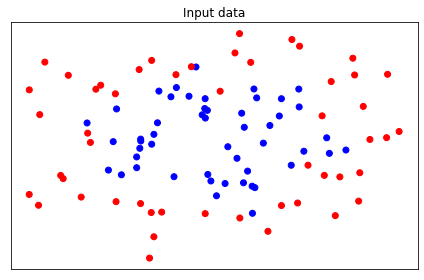

In [13]:
# 绘制数据
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot()

ax.set_title("Input data")
# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [14]:
# 使用网格搜索选择SVM参数
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid={"C":[0.1,1,10],"gamma":[1,0.1,0.01]},cv=4)
grid.fit(X,y)

grid.best_params_,grid.best_score_

({'C': 10, 'gamma': 0.1}, 0.9)

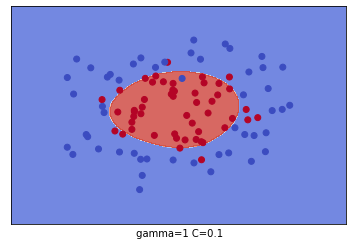

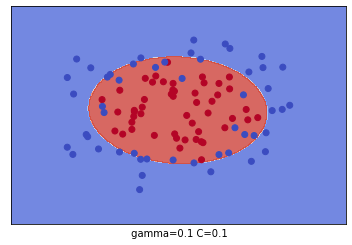

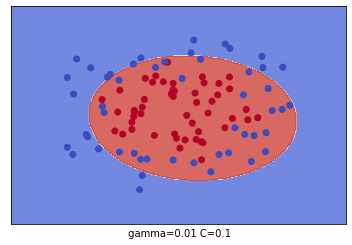

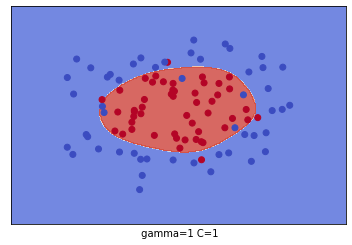

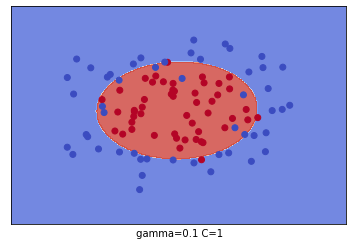

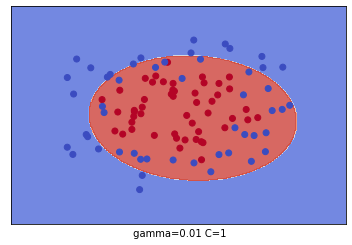

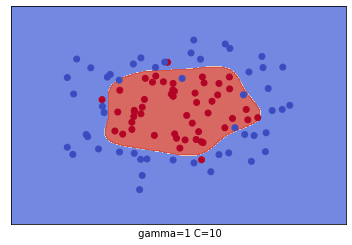

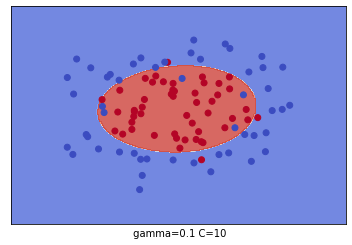

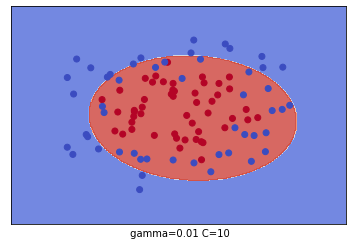

In [15]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.02),
                     np.arange(y_min, y_max, 0.02))

for i,C in enumerate((0.1,1,10)):
    for j,gamma in enumerate((1,0.1,0.01)):
        plt.subplot()       
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(" gamma=" + str(gamma) + " C=" + str(C))
        plt.show()